# Homework 1 - CSCI 7000
## Behzod Mirpochoev

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve

### Problem 1

In [2]:
def SIR_simulation(N, S, I, R, beta, gamma, time):

    S = [S]
    I = [I]
    R = [R]
    dt = 0.01
    timesteps = int(time/dt)

    for _ in range(1,timesteps): 

        S.append(S[-1] + dt * -(beta * S[-1] * I[-1] / N))
        I.append(I[-1] + dt * ((beta * S[-2] * I[-1] / N) - (gamma * I[-1])))
        R.append(N - (S[-2] + I[-2]))

    plt.plot(range(timesteps), S, color = 'blue', label = 'S Behzod')
    plt.plot(range(timesteps), I, color = 'red', label = 'I Behzod')
    plt.plot(range(timesteps), R, color = 'black', label = 'R Behzod')
    plt.xlabel('time')
    plt.ylabel('people')
    plt.title(r'$\beta$ = {}, $\gamma$ = {}'.format(beta, gamma))
    xticks= [tick * dt for tick in plt.xticks()[0]]
    plt.xticks(plt.xticks()[0], ['{:.0f}'.format(tick) for tick in xticks])
    plt.xlim(0,timesteps)
    plt.legend()
    
    plt.show()

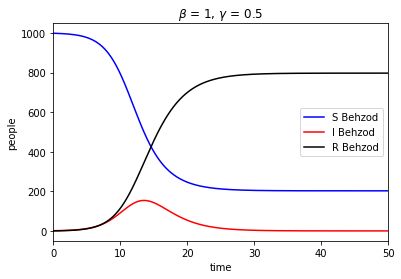

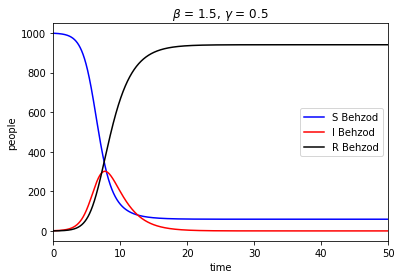

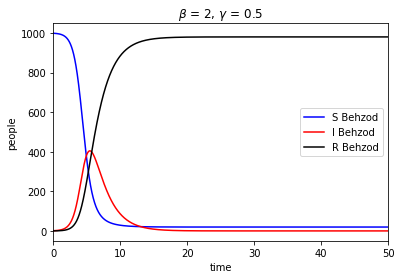

In [3]:
SIR_simulation(N = 1000, S = 999, I = 1, R = 0, beta = 1, gamma = 0.5, time = 50)
SIR_simulation(N = 1000, S = 999, I = 1, R = 0, beta = 1.5, gamma = 0.5, time = 50)
SIR_simulation(N = 1000, S = 999, I = 1, R = 0, beta = 2, gamma = 0.5, time = 50)

### Problem 3

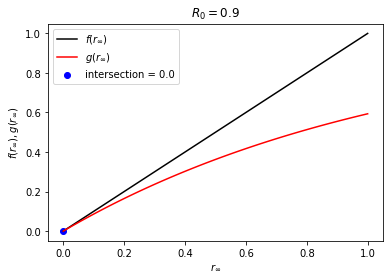

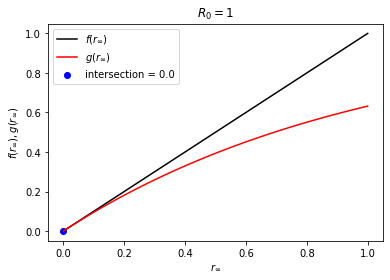

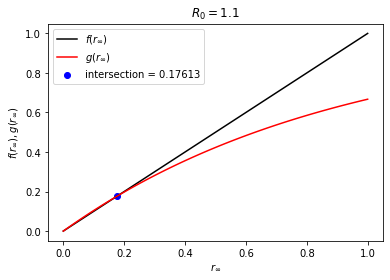

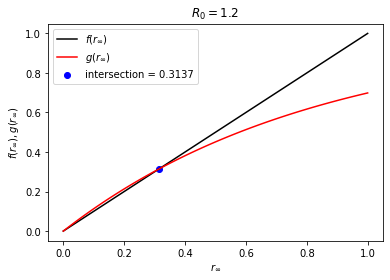

In [4]:
R_0s = [0.9, 1, 1.1, 1.2]
r_inf_range = np.linspace(0,1,100)
initial_guess = 0.5

def f(x):
    return x
def g(x, R_0):
    return 1 - np.exp(-R_0 * x)

for R_0 in R_0s:
    intersection = np.abs(np.round(fsolve(lambda r_inf: f(r_inf) - g(r_inf, R_0), 0.5)[0],5))
    plt.plot(r_inf_range, r_inf_range, color='black', label=r'$f(r_{\infty})$')
    plt.plot(r_inf_range, g(r_inf_range, R_0), color='red', label=r'$g(r_{\infty})$')
    plt.scatter(intersection, intersection, color='blue', label='intersection = {}'.format(intersection))
    plt.title(r'$R_0={}$'.format(R_0))
    plt.xlabel(r'$r_{\infty}$')
    plt.ylabel(r'$f(r_{\infty}),g(r_{\infty})$')
    plt.legend()
    plt.show()

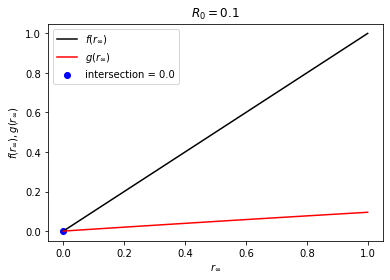

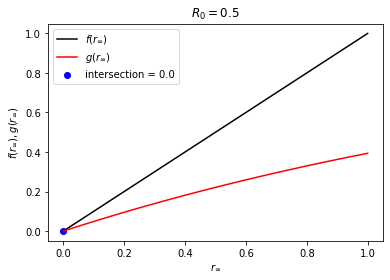

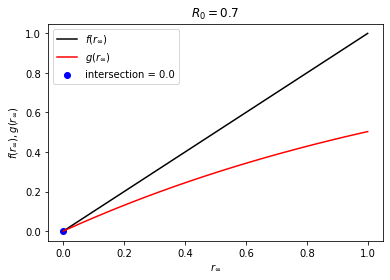

In [5]:
R_0s = [0.1, 0.5, 0.7]
r_inf_range = np.linspace(0,1,100)
initial_guess = 0.5

def f(x):
    return x
def g(x, R_0):
    return 1 - np.exp(-R_0 * x)

for R_0 in R_0s:
    intersection = np.abs(np.round(fsolve(lambda r_inf: f(r_inf) - g(r_inf, R_0), 0.5)[0],5))
    plt.plot(r_inf_range, r_inf_range, color='black', label=r'$f(r_{\infty})$')
    plt.plot(r_inf_range, g(r_inf_range, R_0), color='red', label=r'$g(r_{\infty})$')
    plt.scatter(intersection, intersection, color='blue', label='intersection = {}'.format(intersection))
    plt.title(r'$R_0={}$'.format(R_0))
    plt.xlabel(r'$r_{\infty}$')
    plt.ylabel(r'$f(r_{\infty}),g(r_{\infty})$')
    plt.legend()
    plt.show()

In [6]:
def SIR_simulation_r_inf(N, S, I, R, beta, gamma, time):

    S = [999]
    I = [1]
    R = [0]
    dt = 0.01
    timesteps = int(time/dt)

    for _ in range(1,timesteps): 

        S.append(S[-1] + dt * -(beta * S[-1] * I[-1] / N))
        I.append(I[-1] + dt * ((beta * S[-2] * I[-1] / N) - (gamma * I[-1])))
        R.append(N - (S[-2] + I[-2]))

    R_0 = beta / gamma
    intersection = np.abs(np.round(fsolve(lambda r_inf: f(r_inf) - g(r_inf, R_0), 0.5)[0],5))
    plt.plot(range(timesteps), S, color = 'blue', label = 'S Behzod')
    plt.plot(range(timesteps), I, color = 'red', label = 'I Behzod')
    plt.plot(range(timesteps), R, color = 'black', label = 'R Behzod')
    plt.plot(range(timesteps), [intersection*N] * timesteps, 'g:', label = r'$r_{\infty}$ Behzod')
    plt.xlabel('time')
    plt.ylabel('people')
    plt.title(r'$\beta$ = {}, $\gamma$ = {}'.format(beta, gamma))
    xticks= [tick * dt for tick in plt.xticks()[0]]
    plt.xticks(plt.xticks()[0], ['{:.0f}'.format(tick) for tick in xticks])
    plt.xlim(0,timesteps)
    plt.legend()
    
    plt.show()

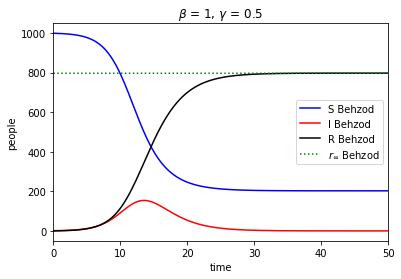

In [7]:
SIR_simulation_r_inf(N = 1000, S = 999, I = 1, R = 0, beta = 1, gamma = 0.5, time = 50)

### Problem 4

In [8]:
def SIR_simulation_epsilon(N, S, I, R, beta, gamma, time, epsilon):
    line_styles = ['-', '--', '-.', ':']

    S = [S]
    I = [I]
    R = [R]
    dt = 0.01
    timesteps = int(time/dt)

    for _ in range(1,timesteps): 

        deltaS = dt * (-(beta * S[-1] * I[-1] / N) + epsilon * (N - S[-1]))
        deltaI = dt * ((beta * S[-1] * I[-1] / N) - (gamma * I[-1]) - epsilon * I[-1])
        deltaR = dt * ((gamma * I[-1]) - epsilon * R[-1])

        S.append(S[-1] + deltaS)
        I.append(I[-1] + deltaI)
        R.append(R[-1] + deltaR)

    plt.plot(range(timesteps), S, color='blue', linestyle=np.random.choice(line_styles), label='S Behzod')
    plt.plot(range(timesteps), I, color='red', linestyle=np.random.choice(line_styles), label='I Behzod')
    plt.plot(range(timesteps), R, color='black', linestyle=np.random.choice(line_styles), label='R Behzod')
    plt.xlabel('time')
    plt.ylabel('people')
    plt.title(r'$\beta$ = {}, $\gamma$ = {}, $\epsilon$ = {}'.format(beta, gamma, epsilon))
    xticks= [tick * dt for tick in plt.xticks()[0]]
    plt.xticks(plt.xticks()[0], ['{:.0f}'.format(tick) for tick in xticks])
    plt.xlim(0,timesteps)
    plt.legend()

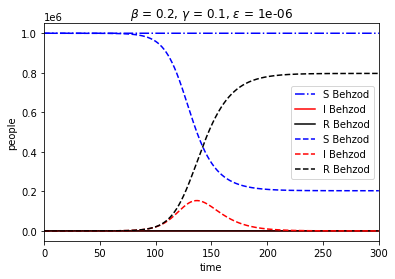

In [9]:
beta = 0.1
gamma = 0.2
N = 1e6
S = 999999
I = 1
R = 0
epsilon = 1/N
SIR_simulation_epsilon(N, S, I, R, beta, gamma, 300, epsilon)

beta = 0.2
gamma = 0.1
N = 1e6
S = 999999
I = 1
R = 0
epsilon = 1/N
SIR_simulation_epsilon(N, S, I, R, beta, gamma, 300, epsilon)